En este experimento correremos kNN con distintos k para distintos tamanios de dataset. Primero corremos un script para el build de las librerias de c++ como modulos de python. Analizaremos con mas profunidad estos resultados en el informe dado junto a esta entrega.

In [ ]:
!sh build.sh

Importamos dependencias

In [1]:
import metnum
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score
from pathlib import Path
import time
from utils import get_MNIST_XY
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

Obtenemos los X e y de MNIST, shuffleados con 70000 elementos.

In [4]:
X_all, y_all = get_MNIST_XY(0.8, 70000)

Seteamos los tamanios de dataset a probar

In [3]:
cant_imagenes = [100, 500, 1000, 5000, 10000, 20000, 50000, 70000]
best_ks = [2, 3, 4, 5, 6]

In [5]:
accuracies = np.zeros((len(best_ks), len(cant_imagenes)))
durations = np.zeros((len(best_ks), len(cant_imagenes)))
for i, k in enumerate(best_ks):
    for j, cant in enumerate(cant_imagenes):
        y = y_all.astype(int)[:cant]
        X = X_all.astype(int)[:cant]
        limit = int(0.8 * X.shape[0]) 
        X_train, y_train = X[:limit], y[:limit]
        X_val, y_val = X[limit:], y[limit:]

        assert len(X_train) == len(y_train)
        assert len(X_val) == len(y_val)

        print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

        start =  time.process_time()
        clf_metnum = metnum.KNNClassifier(k)
        clf_metnum.fit(X_train, y_train)
        clf_mentum_predicted = clf_metnum.predict(X_val)
        end = time.process_time()
        accuracies[i, j] = accuracy_score(clf_mentum_predicted, y_val)
        durations[i, j] = end - start

Ahora tengo 80 instancias de entrenamiento y 20 de validación
Ahora tengo 400 instancias de entrenamiento y 100 de validación
Ahora tengo 800 instancias de entrenamiento y 200 de validación
Ahora tengo 4000 instancias de entrenamiento y 1000 de validación
Ahora tengo 8000 instancias de entrenamiento y 2000 de validación
Ahora tengo 16000 instancias de entrenamiento y 4000 de validación
Ahora tengo 40000 instancias de entrenamiento y 10000 de validación
Ahora tengo 56000 instancias de entrenamiento y 14000 de validación
Ahora tengo 80 instancias de entrenamiento y 20 de validación
Ahora tengo 400 instancias de entrenamiento y 100 de validación
Ahora tengo 800 instancias de entrenamiento y 200 de validación
Ahora tengo 4000 instancias de entrenamiento y 1000 de validación
Ahora tengo 8000 instancias de entrenamiento y 2000 de validación
Ahora tengo 16000 instancias de entrenamiento y 4000 de validación
Ahora tengo 40000 instancias de entrenamiento y 10000 de validación
Ahora tengo 56000 

In [6]:
accuracies

array([[0.75      , 0.88      , 0.89      , 0.94      , 0.9405    ,
        0.96175   , 0.9714    , 0.97128571],
       [0.7       , 0.83      , 0.905     , 0.941     , 0.9435    ,
        0.96125   , 0.9712    , 0.97314286],
       [0.7       , 0.81      , 0.91      , 0.936     , 0.9415    ,
        0.96075   , 0.9709    , 0.97242857],
       [0.7       , 0.82      , 0.905     , 0.935     , 0.9385    ,
        0.958     , 0.9694    , 0.972     ],
       [0.65      , 0.81      , 0.9       , 0.929     , 0.9375    ,
        0.95775   , 0.9688    , 0.97128571]])

In [7]:
durations

array([[1.10562400e-03, 1.98563920e-02, 7.95057230e-02, 2.68316914e+00,
        1.05705481e+01, 4.27652881e+01, 2.61676661e+02, 5.10382623e+02],
       [1.13619910e-02, 1.98509620e-02, 8.21013880e-02, 2.72638118e+00,
        1.04082087e+01, 4.17064553e+01, 2.56171027e+02, 5.08200413e+02],
       [9.47745600e-03, 1.78054050e-02, 7.05271400e-02, 2.60783256e+00,
        1.06944220e+01, 4.23854200e+01, 2.60288389e+02, 5.14613511e+02],
       [9.14152400e-03, 1.87093310e-02, 7.51766800e-02, 2.63328041e+00,
        1.06228248e+01, 4.16107950e+01, 2.58644615e+02, 5.33081399e+02],
       [9.67271100e-03, 2.08772770e-02, 7.92215290e-02, 2.70326078e+00,
        1.10022255e+01, 4.33198845e+01, 2.50476563e+02, 5.05918995e+02]])

Generamos graficos mostrando el cambio en del accuracy y performance mientras aumenta el tamanio del dataset

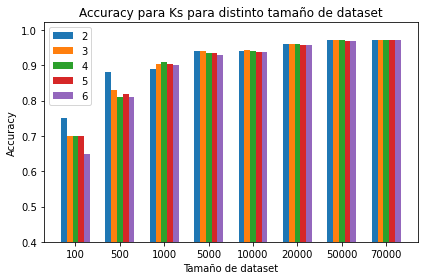

In [8]:
x = np.arange(len(cant_imagenes))  # the label locations
width = 0.13
fig, ax = plt.subplots()
positions = [x - 2 * width, x - width, x, x + width, x + 2 * width]
for index, k in enumerate(best_ks):
    rects1 = ax.bar(positions[index], accuracies[index], width, label=k)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Tamaño de dataset')
ax.set_title('Accuracy para Ks para distinto tamaño de dataset')
ax.set_xticks(x)
ax.set_ylim(0.4)
ax.set_xticklabels(cant_imagenes)
ax.legend()

fig.tight_layout()

plt.show()

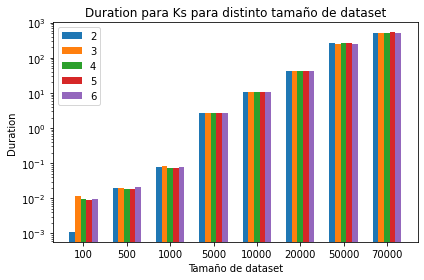

In [9]:
x = np.arange(len(cant_imagenes))  # the label locations
width = 0.13
fig, ax = plt.subplots()
positions = [x - 2 * width, x - width, x, x + width, x + 2 * width]
for i, k in enumerate(best_ks):
    rects = ax.bar(positions[i], durations[i], width, label=k)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Duration')
ax.set_xlabel('Tamaño de dataset')
ax.set_title('Duration para Ks para distinto tamaño de dataset')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(cant_imagenes)
ax.legend()

fig.tight_layout()

plt.show()